# Self-Organizing Maps

## Praktikum

### a) Fungsi *self-organizing maps*
Tulis kode ke dalam *cell* di bawah ini:

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def som(X, lrate, b, max_epoch, n_cluster):
  centroids = np.random.uniform(size=(n_cluster, len(X[0])))
  epoch = 0
  labels = []

  while epoch < max_epoch:
    for x in X:
      d = [sum((w - x) ** 2) for w in centroids]
      min = np.argmin(d)
      centroids[min] += lrate * (x - centroids[min])
    lrate *= b
    epoch += 1

  for x in X:
    d = [sum((w - x) ** 2) for w in centroids]
    min = np.argmin(d)

    labels.append(min)

  return centroids, labels

def draw(X, target, centroids):
  colors = 'rgbcmyk'
  
  for x, label in zip(X, target):
    plt.plot(x[0], x[1], colors[label] + '.')
  plt.plot(centroids[:, 0], centroids[:, 1], 'kx')

### b) Klasterisasi
Tulis kode ke dalam *cell* di bawah ini:

Silhouette score: 0.6157837764356677


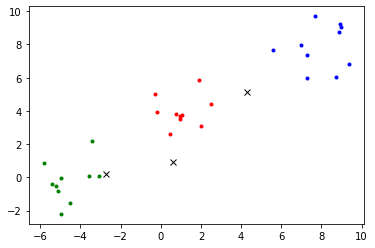

In [33]:
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

X, target = make_blobs(n_samples=30, n_features=2, centers=3, random_state=3)
centroids, labels = som(X, lrate=.05, b=.5, max_epoch=3,n_cluster=3)
silhouette = silhouette_score(X, labels)

print('Silhouette score:', silhouette)
draw(X, target, centroids)

In [40]:
sil = []
for i in range(1,251):
    centroids, labels = som(X, lrate=.05, b=.5, max_epoch=i,n_cluster=3)
    sil.append(silhouette_score(X, labels))

Text(0, 0.5, 'Silhouette Score')

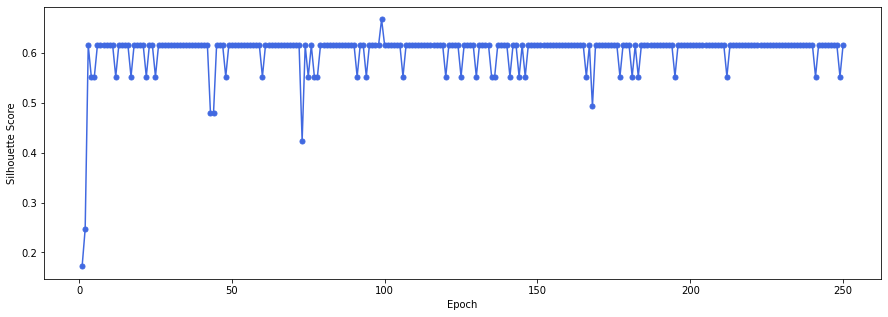

In [41]:
plt.figure(figsize=(15,5))
plt.plot(range(1,251),sil,color='royalblue', marker='o', markersize=5)
plt.xlabel('Epoch')
plt.ylabel('Silhouette Score')